<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/ml/T3/Janio_Souza_Lima_ML_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Aprendizado de Máquina - 2021/1**

* **Trabalho 03**
* **Professor**: Eduardo Bezerra
* **Aluno**: Janio de Souza Lima

##Preparação do ambiente

Importação de bibliotecas

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.io

Carga de arquivos para ambiente (apenas para uso deste notebook no Google Colab)

In [2]:
from google.colab import drive

In [3]:
#Conecta o Google Colab ao Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A etapa anterior apenas conecta ao seu Google Drive, após rodá-la e autenticar a sessão usando o link da API da Google, o código abaixo deve ser executado para apontar para o diretório de trabalho no qual estão gravados os códigos e bibliotecas personalziadas que serão usados na análise.

Os códigos* em questão estão disponíveis em: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t1/code

** Em alguns casos foi necessário adaptar partes das funções originais disponíveis no repositório citado ou substituí-las por versões que estão escritas nas próprias células deste notebook* ou no repositório disponível em: https://github.com/janiosl/python.ds/tree/master/ml/T1/code.

A pasta com os dados deve ser gravada neste mesmo diretório com o nome *data*, assim os trechos nos quais os conjuntos de dados são carregados rodarão sem problemas.

In [4]:
#Define o path dos códigos e dados como diretório de trabalho atual
import os
dir = '/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/t3'
os.chdir(dir)

#1 Aprendizado de Comitês

##Análise preliminar dos dados

Carga e organização dos dados de treino e teste

---

Conjunto de dados analisado:

![dataset1](https://github.com/janiosl/python.ds/blob/master/ml/T3/data/dataset1.PNG?raw=true)

*Fonte: Tabela copiada de Eduardo Bezerra, enunciado desse trabalho (Trabalho 03).*

O conjunto de dados está dividido em dois arquivos. Um conjunto de treino com 1500 observações e um de testes com 577 observações. Para realização das análises dessa seção, quando necessário, o conjunto de originalmente separado para treino foi novamente dividido para uso como treino e validação na proporção de 80% para treino e 20% para validação.

In [5]:
#Definção dos títulos das colunas
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

In [6]:
#Carga do conjunto de treino
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'
data_train = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

#Conferência dos primeiros registros do conjunto de dados
data_train.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [7]:
#Estatísticas descritivas do conjunto de treino
data_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [8]:
#Transoformação dos atributos e da classe alvo em matrizes
X_train = np.array(data_train.iloc[:, 0:11])
y_train = np.array(data_train['CLASSE'])

In [9]:
#Conferência dos primeiros registros dos atributos
X_train[:5]

array([[   1,    0,  360,    0,  313,    9,   52,    0,   25,   48,    0],
       [   0,    0,  350,    1,  468,   10,   65,    0,   33,    6,    0],
       [   0,    0, 1100,    0,  829,    9,  125,    0,   56,   48,    0],
       [   0,    0, 3000,    0,  552,   12,   76,    1,   31,   60,    0],
       [   1,    0, 1000,    0,  809,   12,  111,    0,   24,    7,    0]])

In [10]:
#Conferência dos primeiros registros do classe alvo
y_train[:5]

array([1, 1, 1, 1, 1])

In [11]:
#Conferência das dimensões das matrizes
print(X_train.shape, y_train.shape)

(1500, 11) (1500,)


In [12]:
#Carga do conjunto de treino
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

#Conferência dos primeiros registros do conjunto de dados
data_test.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


In [13]:
#Estatísticas descritivas do conjunto de treino
data_test.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.547660,0.110919,930.623917,0.452340,568.377816,8.402080,103.755633,0.112652,41.188908,29.270364,26.528596,0.469671
std,0.710706,0.511841,876.614452,0.498155,352.600280,3.633065,67.692428,0.316441,13.477631,50.100313,90.786052,0.499512
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,475.000000,0.000000,399.000000,6.000000,66.000000,0.000000,30.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,600.000000,0.000000,489.000000,10.000000,85.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1000.000000,1.000000,623.000000,10.000000,117.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,5.000000,9675.000000,1.000000,6000.000000,21.000000,719.000000,1.000000,70.000000,360.000000,1150.000000,1.000000


In [14]:
#Transoformação dos atributos e da classe alvo em matrizes
X_test = np.array(data_test.iloc[:, 0:11])
y_test = np.array(data_test['CLASSE'])

In [15]:
#Conferência das dimensões das matrizes
print(X_test.shape, y_test.shape)

(577, 11) (577,)


Divisão do conjunto originalmente criado como treinamento em novos subconjuntos para:
* Treino: 80% dos dados do arquivo `credtrain.txt`
* Validação: 20% dos dados do arquivo `credtrain.txt`

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  train_size=0.2,
                                                  random_state=31)

In [17]:
print(X_train.shape, y_train.shape,
      X_val.shape, y_val.shape)

(300, 11) (300,) (1200, 11) (1200,)


##1.1 Boosting

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

* **AdaBoost**

Comentar:
* O uso do próprio AdaBoost como indutor;
* Mas ressaltar a possibilidade de uso da classe em conjunto com outros algoritmos;

In [19]:
#Criação do indutor AdaBoost sem alteração de hiperparâmetros
adaB_clf = AdaBoostClassifier()

In [20]:
#Treinamento do modelo
adaB_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

* **Gradient Boosting**

In [21]:
#Criação do indutor Gradient Boosting sem alteração de hiperparâmetros
gdB_clf = GradientBoostingClassifier()

In [22]:
#Treinamento do modelo
gdB_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

* **Curva de Aprendizado**

O trecho a seguir realiza o uso da função `learning_curve` da biblioteca Scikit-Learn para cálculos os dados para visualização da curva de aprendizagem dos modelos treinados nessa seção. Foi usado como pontuação a métrica acurácia, que demonstra o nível atingido por cada modelo à medida que são alteradas as quantidades de observações no conjunto de treinamento e validação.

In [23]:
#Biblioteca para cálculo da curva de aprendizado
from sklearn.model_selection import learning_curve

* **Curva de Aprendizado do Modelo AdaBoost**

In [24]:
#Aplicação da função para comparação dos resultados de validação e treino
qtds_exemplos, acc_treino, acc_val = learning_curve(adaB_clf,
                                                        X_test,
                                                        y_test,
                                                        scoring='accuracy'
                                                        )

In [25]:
#Cálculo dos scores baseado na média das rodadas
acc_tA = np.mean(acc_treino, axis=1)
acc_vA = np.mean(acc_val, axis=1)

* **Curva de Aprendizado do Modelo Gradient Boosting**

In [26]:
#Aplicação da função para comparação dos resultados de validação e treino
qtds_exemplos, acc_treino, acc_val = learning_curve(adaB_clf,
                                                        X_test,
                                                        y_test,
                                                        scoring='accuracy'
                                                        )

#Cálculo dos scores baseado na média das rodadas
acc_tG = np.mean(acc_treino, axis=1)
acc_vG = np.mean(acc_val, axis=1)

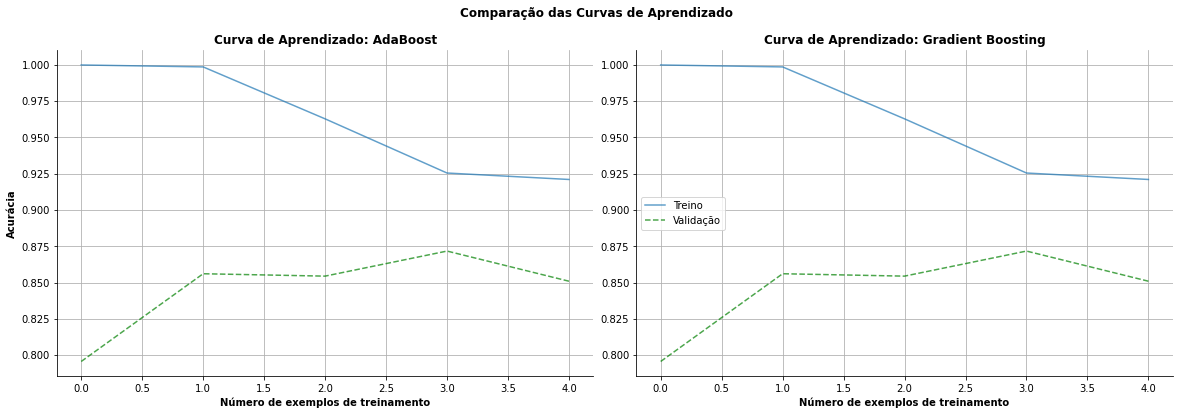

In [27]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparação das Curvas de Aprendizado', fontweight='bold')

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Curva de aprendizado AdaBoost
#=========================================
ax1.plot(acc_tA, alpha=0.7)         #Treino
ax1.plot(acc_vA, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax1.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax1.set_ylabel('Acurácia', fontweight='bold')
ax1.set_title('Curva de Aprendizado: AdaBoost', fontweight='bold')
ax1.grid()


#Curva de aprendizado Gradient Boosting
#=========================================
ax2.plot(acc_tG, alpha=0.7)         #Treino
ax2.plot(acc_vG, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax2.legend(['Treino', 'Validação'], loc='center left')
ax2.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax2.set_title('Curva de Aprendizado: Gradient Boosting', fontweight='bold')
ax2.grid()


#Ajustes visuais finais
#=========================================
sns.despine()
plt.subplots_adjust(wspace=0.08)
plt.savefig('target/plot1.1.png')

* Aplicação dos modelos para predição e avaliação do escore com o conjunto de tests

In [28]:
#AdaBoost
#========================================

#Uso dos modelos para predição
y_pred_adaB = adaB_clf.predict(X_test)

#Visualização das primeiras observações da predição efetuada
y_pred_adaB[:5]

array([0, 1, 1, 1, 0])

In [29]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_adaB))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       306
           1       0.88      0.82      0.85       271

    accuracy                           0.86       577
   macro avg       0.87      0.86      0.86       577
weighted avg       0.87      0.86      0.86       577



In [30]:
#Gradient Boosting
#========================================

#Uso dos modelos para predição
y_pred_gdB = gdB_clf.predict(X_test)

#Visualização das primeiras observações da predição efetuada
y_pred_gdB[:5]

array([0, 1, 1, 1, 0])

In [31]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_gdB))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       306
           1       0.91      0.82      0.86       271

    accuracy                           0.88       577
   macro avg       0.88      0.87      0.88       577
weighted avg       0.88      0.88      0.88       577



##1.2 Bagging

#2 Sistemas de Recomendação

##2.1 Algoritmo de aprendizagem de filtragem colaborativa

###2.1.1 Função de custo da filtragem colaborativa

###2.1.2 Gradiente de filtragem colaborativa

##2.2 Aprendizado de Recomendações para Filmes

#3 Redes Neurais Artificiais

##3.1 Redes MLP

##3.2 Redes Convolucionais

#Referências

**Referências**

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

---

**Algoritmos e conjuntos de dados:**

* Bibliotecas personalizadas e conjuntos de dados usados na análise: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t3
* Códigos complementares usados na análise: https://github.com/janiosl/python.ds/tree/master/ml/T1
* Códigos complementares usados na análise: https://github.com/janiosl/python.ds/tree/master/ml/T2
* Métodos de aprendizado por comitê: https://github.com/janiosl/python.ds/tree/master/ml/ensemble
* Florestas Aleatórias: https://github.com/janiosl/python.ds/tree/master/ml/randomForest
* Métodos de aprendizado de comitê e florestas aleatórias: https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
* Métodos de sistemas recomendadores: https://github.com/janiosl/python.ds/tree/master/ml/recommender